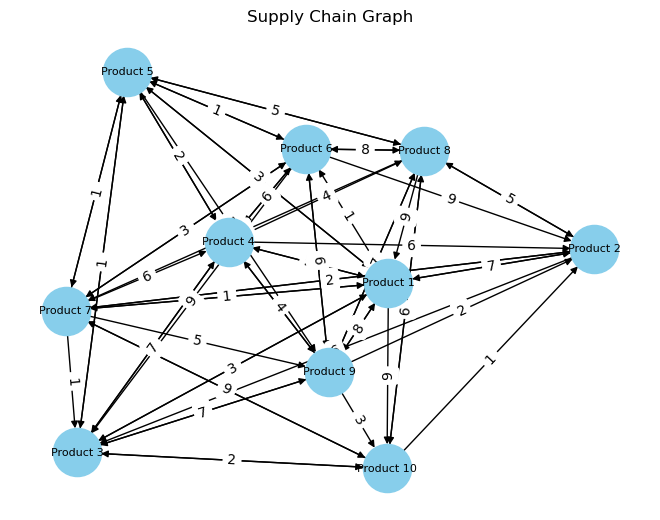

Data(x=[10, 7], edge_index=[2, 64], y=[10])


In [2]:
import torch
from torch_geometric.data import Data
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_products = 10
num_warehouses = 3
num_samples = 100

# Numeric features
product_id = np.arange(1, num_products + 1)
price = np.random.uniform(10, 100, num_products)
quantity_sold = np.random.randint(50, 500, num_products)
warehouse_stock = np.random.randint(100, 1000, num_products)
lead_time_days = np.random.randint(1, 30, num_products)
promotion_budget = np.random.uniform(1000, 5000, num_products)

# Target variable
demand = quantity_sold + np.random.randint(-50, 50, num_products)

# Create a data frame
df_products = pd.DataFrame({
    'Product_ID': product_id,
    'Price': price,
    'Quantity_Sold': quantity_sold,
    'Warehouse_Stock': warehouse_stock,
    'Lead_Time_Days': lead_time_days,
    'Promotion_Budget': promotion_budget,
    'Demand': demand
})

# Generate synthetic graph data
edges = []
for _ in range(num_samples):
    source = np.random.choice(product_id)
    target = np.random.choice(product_id[product_id != source])
    weight = np.random.randint(1, 10)
    edges.append((source, target, weight))

# Create a directed graph
G = nx.DiGraph()
G.add_nodes_from(product_id)

# Add edges with weights
G.add_weighted_edges_from(edges)

# Visualize the graph
pos = nx.spring_layout(G)
labels = {node: f'Product {node}' for node in G.nodes()}

edge_labels = {(edge[0], edge[1]): edge[2]['weight'] for edge in G.edges(data=True)}

nx.draw(G, pos, with_labels=True, labels=labels, node_color='skyblue', node_size=1200, font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Supply Chain Graph')
plt.show()

# Create a PyTorch Geometric Data object
edge_index = torch.tensor(list(G.edges)).t().contiguous()
x = torch.tensor(df_products.values, dtype=torch.float32)
y = torch.tensor(df_products['Demand'].values, dtype=torch.float32)

data = Data(x=x, edge_index=edge_index, y=y)

# Display the PyTorch Geometric Data object
print(data)


Epoch 1/100, Average Loss: 1.0195595791339875
Epoch 2/100, Average Loss: 1.01473894033432
Epoch 3/100, Average Loss: 1.0122549061139425
Epoch 4/100, Average Loss: 1.0104849057912826
Epoch 5/100, Average Loss: 1.0091363058185578
Epoch 6/100, Average Loss: 1.0081590598901113
Epoch 7/100, Average Loss: 1.0073969385419572
Epoch 8/100, Average Loss: 1.0067351131856441
Epoch 9/100, Average Loss: 1.0062411289374034
Epoch 10/100, Average Loss: 1.0058360183286668
Epoch 11/100, Average Loss: 1.0054711164561185
Epoch 12/100, Average Loss: 1.0051719353636106
Epoch 13/100, Average Loss: 1.004911944756141
Epoch 14/100, Average Loss: 1.0047143520832063
Epoch 15/100, Average Loss: 1.0045116249370576
Epoch 16/100, Average Loss: 1.004321632272005
Epoch 17/100, Average Loss: 1.0041545486029457
Epoch 18/100, Average Loss: 1.0040162289116117
Epoch 19/100, Average Loss: 1.0039026400591198
Epoch 20/100, Average Loss: 1.003777974498272
Epoch 21/100, Average Loss: 1.0036786479745592
Epoch 22/100, Average Loss:

In [23]:
import torch
from torch_geometric.data import Data
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyvis.network import Network

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_warehouses = 300
num_products = 10
num_samples = 100

# Numeric features for products
product_id = np.arange(1, num_products + 1)
price = np.random.uniform(10, 100, num_products)
quantity_sold = np.random.randint(50, 500, num_products)
warehouse_stock = np.random.randint(100, 1000, num_products)
lead_time_days = np.random.randint(1, 30, num_products)
promotion_budget = np.random.uniform(1000, 5000, num_products)

# Target variable for products
demand = quantity_sold + np.random.randint(-50, 50, num_products)

# Create a DataFrame for products
df_products = pd.DataFrame({
    'Product_ID': product_id,
    'Price': price,
    'Quantity_Sold': quantity_sold,
    'Warehouse_Stock': warehouse_stock,
    'Lead_Time_Days': lead_time_days,
    'Promotion_Budget': promotion_budget,
    'Demand': demand
})

# Generate synthetic graph data with more links for each node
edges = []
for _ in range(num_samples):
    source_warehouse = np.random.choice(num_warehouses) + 1
    target_warehouse = np.random.choice(num_warehouses) + 1

    products_to_transfer = np.random.choice(product_id, size=np.random.randint(1, 5), replace=False)
    quantities = np.random.randint(1, 10, len(products_to_transfer))

    edges.append((source_warehouse, target_warehouse, {'products': products_to_transfer.tolist(), 'quantities': quantities.tolist()}))

    # Add more links for each node
    for _ in range(np.random.randint(1, 4)):  # Adjust the range for the number of additional links
        additional_target_warehouse = np.random.choice(num_warehouses) + 1
        edges.append((source_warehouse, additional_target_warehouse, {'products': [], 'quantities': []}))

# Create a directed graph
G = nx.DiGraph()
G.add_nodes_from(range(1, num_warehouses + 1))

# Add edges with product information
G.add_edges_from(edges)

# Create a PyVis Network
net = Network(notebook=True, width="100%", height="500px")

# Add nodes with different colors and labels for different warehouses
for node, attrs in G.nodes(data=True):
    warehouse_number = node
    color = f'#{warehouse_number % 256:02x}0000'  # Use different colors for different warehouses
    label = f'Warehouse {node}'
    net.add_node(node, color=color, label=label, title=label)

# Add edges with product names
for edge in G.edges(data=True, default=None):
    if isinstance(edge, tuple) and len(edge) == 3:
        source, target, attrs = edge
        products = ", ".join(str(p) for p in attrs.get('products', []))
        net.add_edge(source, target, label=f'{len(attrs.get("products", []))} products: {products}', title=f'{len(attrs.get("products", []))} products: {products}')

# Visualize the graph using pyvis
net.show("supply_chain_graph.html")


supply_chain_graph.html
